# Laboratorio 1: Regresión en Boston

## Grupo 4_2:
* Bornancini Verónica
* Berberian Ará
* Ramos Matias
* Juarez Ezequiel
* Garrigo Edgardo
* Saurit Lucas

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
boston['data']           # matriz con los datos de entrada (atributos)
boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [5]:
from sklearn.model_selection import train_test_split

X, Y = boston['data'], boston['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea
Responda las siguientes preguntas:   


1.¿De qué se trata el conjunto de datos?    
2.¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?   
3.¿Qué información (atributos) hay disponibles para hacer la predicción?    
4.¿Qué atributos imagina ud. que serán los más determinantes para la predicción?    
5.¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

In [6]:
import pandas as pd

tabla = pd.DataFrame(boston.data, columns = boston.feature_names)
tabla[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**RESPUESTAS:**    
**1)** El dataset reune información sobre **506** viviendas ubicadas en el área metropolitana de Boston, recopilada por el Servicio de Censos de USA. Cada una de las viviendas tiene especificada información que puede influir en el precio final de la misma, algunos de estos atributos son: el lugar donde se encuentra, los servicios, el tipo de barrio, la facilidad de acceso a la misma, y la cercanía a diferentes instituciones. Este dataset pertenece a un paper publicado por *Harrison, D. & Rubinfeld, D.L. 1978* (Los precios hedónicos y la demanda de aire limpio, J. Environ. Economics & Management, vol.5, 81-102, DOI: 10.1016/0095-0696(78)90006-).

**2)** Nuestra variable objetivo será **MEDV (Target)**, la cual se refiere al valor medio de viviendas ocupadas por sus propietarios en miles de dólares, siendo el valor mínimo = 5, el máximo = 50, con una media = 22.5, para un total de 506 registros.
* (The last row describes the median price of owner-occupied homes (this leaves out homes that are rented out), and it's usually the row that we are trying to predict when we use it for regression tasks. https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8)   

**3)** Los atributos disponibles para hacer el análisis son 13:
* 1- **CRIM:** Tasa de crimen per capita por ciudad.
* 2- **ZN:** Proporción del área recidencial para lotes mayores de 25,000 pies cuadrados.
* 3- **INDUS:** Proporción de acres de negocios no minoristas por ciudad.
* 4- **CHAS:** Indica si el terreno limita con el rio Charles (Si limita=1, No limita=0).
* 5- **NOX:** Concentración de óxido nítrico (partes por 10 millones).
* 6- **RM:** Promedio de habitaciones por vivienda.
* 7- **AGE:** Proporción de viviendas ocuapdas por sus propietarios, construidas antes de 1940.
* 8- **DIS:** Distancias ponderadas hacia 5 centros de empleo en Boston.
* 9- **RAD:** Indice de accesibilidad a las autopistas radiales.
* 10- **TAX:** Tasa del impuesto a la propiedad (cada $10,000).
* 11- **PTRATIO:** Relacion alumno/profesor por ciudad. 
* 12- **B:** 1.000(Bk - 0.63)^2 donde Bk es la proporcion de personas afroamericanas por ciudad.
* 13- **LSTAT:** Porcentaje de poblacion de clase baja.

**4)** Posiblemente los atributos mas relevantes sean **CRIM**, **RM**, **DIS**, **RAD**, **NOX** y **TAX**.    
**5)** Observaciones a priori:
* Hay que tener en cuenta que el tamaño del dataset es pequeño (506 registros) comparado con la gran magnitud de datos que se pueden relevar actualemnte.
* Es posible observar que algunas variables como **B** y **LSTAT** tienen un sesgo social lo cual no sería eticamente correcto. 
* Otro dato que debemos tener en cuenta, es que el dataset es bastante antiguo (1978), por lo tanto no se podria concluir el valor absoluto de una propiedad en el futuro, aunque si se podria predicir relativamente cuales tendrian mayor o menor valor en funcion de los atributos recogidos y si algunos de ellos no tienen impacto en el precio. Probablemente para evaluar el precio en un futuro cercano sea necesario nuevos atributos que no se han medido, medir nuevamente los seleccionados, o incluso, alguno que hoy no tiene correlacion pueda tenerla en el futuro (o al reves) debido al avance tecnologico (por ejemplo distancia al trabajo, probablemente antes era importante, pero hoy en dia el teletrabajo es comun y podria no ser relevante a la hora de impactar en el valor de una vivienda)

## Ejercicio 2: Visualización de los Datos

#### **2.1** Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.


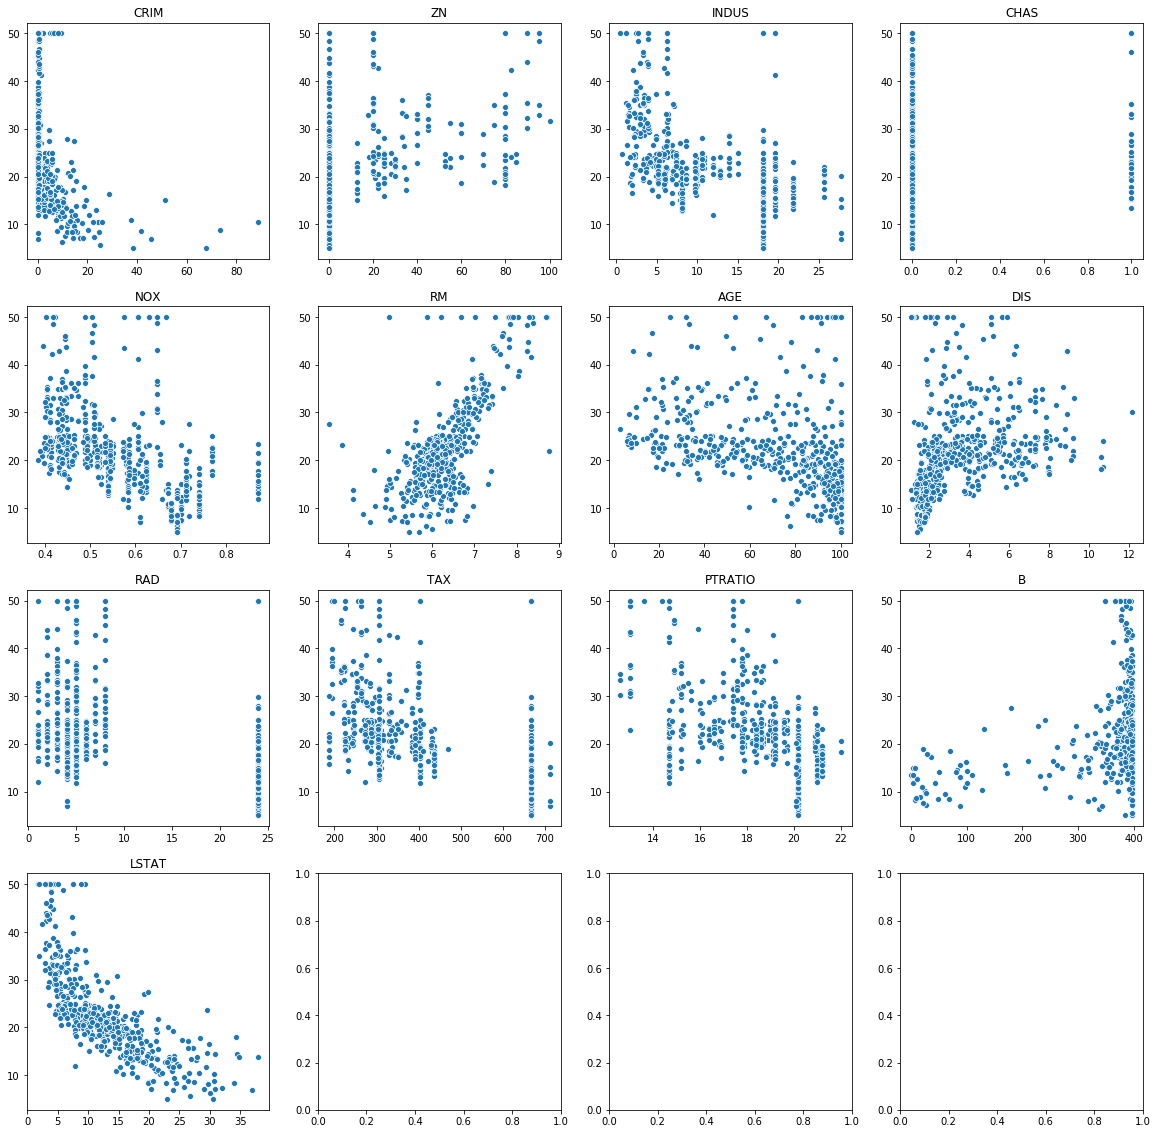

In [7]:
import seaborn
import matplotlib.pyplot as plt

# boston['feature_names'] => nombres de los atributos para cada columna de 'data'

fig,axs = plt.subplots(4,4,figsize=(20,20))
row = 0
col = 0

for feature in boston['feature_names']:
        selector = (boston['feature_names'] == feature)
        seaborn.scatterplot(X[:, selector].flatten(), Y, ax=axs[row, col])
        axs[row, col].set_title(feature)
        col = col + 1 if col < 3 else 0
        row = row + 1 if col == 0 else row
plt.show()

#### **2.2** Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

* Según el análisis hecho a simple vista podemos obervar que las variables **RM** y **LSTAT** son las que presentan una mayor correlacionan con **MEDV**(target).
* En menor medida pareciera que las variable **NOX** y **DIS** tuvieran una correlación, pero esta no parece ser significativa a simple vista. Por lo tanto necesitamos un análisis a posteriori, luego de haber limpiado los datos. 
* **CRIM** es otra variable que parece ser bastante informativa para la predicción de **MEDV**. 

#### **2.3** Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

* **CRIM** (Tasa de crimen per capita por ciudad)
* **RM** (Promedio de habitaciones por vivienda)
* **LSTAT** (Porcentaje de poblacion de clase baja)
* **NOX** (Concentración de óxido nítrico)
* **DIS** (Distancias ponderadas hacia 5 centros de empleo en Boston)

## Ejercicio 3: Regresión Lineal

#### **3.1** Seleccione un solo atributo que considere puede ser el más apropiado.

In [8]:
# Selección de un atributo: RM
feature = 'RM' 
selector = (boston['feature_names'] == feature)

X_train_f1 = X_train[:, selector]
X_test_f1 = X_test[:, selector]
X_train_f1.shape, X_test_f1.shape

((404, 1), (102, 1))

#### **3.2** Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.


In [9]:
import sklearn
from sklearn.linear_model import LinearRegression

# Instanciamiento de un modelo de regresión lineal
regression_model = LinearRegression()  

In [10]:
# Entrenamiento del modelo
regression_model.fit(X_train_f1, Y_train);

#### **3.3** Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [11]:
# Obtención de los valores predichos para los datos de entrenamiento
Y_train_pred = regression_model.predict(X_train_f1)

# Obtención de los valores predichos para los datos de evaluación
Y_test_pred = regression_model.predict(X_test_f1)

In [12]:
from sklearn.metrics import mean_squared_error

# Cálculo del error cuadrático medio sobre ambos conjuntos de datos (train y test)
train_error = mean_squared_error(Y_train, Y_train_pred)
test_error = mean_squared_error(Y_test, Y_test_pred)
print(f'Train error:{train_error:0.3}')
print(f'Test error:{test_error:0.3}')

Train error:42.8
Test error:46.9


#### **3.4** Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.


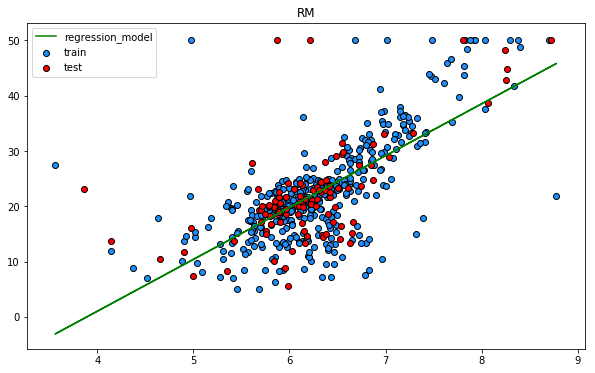

In [13]:
plt.figure(figsize=(10,6))
plt.plot(X[:, selector], regression_model.predict(X[:, selector]), 
         color="green", label="regression_model")

plt.scatter(X_train_f1, Y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f1, Y_test, facecolor="red", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

### **3.5** Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

* El modelo de regresion lineal obtenido para la variable **RM** (Numero promedio de habitaciones por vivienda) muestra una cierta relación entre la variable en estudio y **MEDV**.

* Como podemos observar, si bien el modelo se ajusta a una gran cantidad de datos, este es un modelo muy sensillo que no alcanza a representar a muchos de los registros. Por lo tanto probaremos agregandole complejidad al modelo haciendo una regresion polinomial en el paso siguiente del análisis.

## Ejercicio 4: Regresión Polinomial

* En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.
* Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.
* **Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

#### 4.1 Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [15]:
# Paso los vectores a matrices con reshape para que sklearn los pueda leer
X_train_f = X_train_f1.reshape(-1, 1)
X_test_f = X_test_f1.reshape(-1, 1)

In [16]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # grados del polinomio

for degree in degrees:
    # Entrenamiento (train):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, Y_train)
    
    #  Predicción (predict):
    Y_train_pred = model.predict(X_train_f)
    Y_test_pred = model.predict(X_test_f)
    
    # Evaluación (evaluate):
    train_error = mean_squared_error(Y_train, Y_train_pred)
    test_error = mean_squared_error(Y_test, Y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

#### 4.2 Grafique las curvas de error en términos del grado del polinomio.

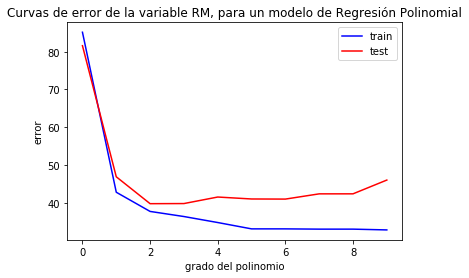

In [17]:
plt.figure(figsize=(6,4))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.title("Curvas de error de la variable RM, para un modelo de Regresión Polinomial")
plt.xlabel("grado del polinomio")
plt.ylabel("error")
plt.show()

#### 4.3 Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.

* Es posible observar que para la Regresion Polinomial de **grado 1** (Regresion Lineal) los errores de train y test son similares a los obtenidos en el ejercicio anterior.
* En cuanto a la Regresión Polinomial de **grado 2** ambos errores bajan y son mas parecidos entre si respecto al par de errores obtenidos para el polinomio de grado 1.
* A partir del **grado 3** se observa una disminucion constante del error en el entrenamiento y un leve aumento del error de test, lo que lleva a una separacion de ambas curvas, esto indica que el modelo se esta sobreajustando (overfitting).

#### 4.4 Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

In [18]:
degree = 2

# Entrenamiento (train):
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, Y_train)
    
#  Predicción (predict):
Y_train_pred = model.predict(X_train_f)
Y_test_pred = model.predict(X_test_f)
    
# Evaluación (evaluate):
train_error = mean_squared_error(Y_train, Y_train_pred)
test_error = mean_squared_error(Y_test, Y_test_pred)
train_errors.append(train_error)
test_errors.append(test_error)


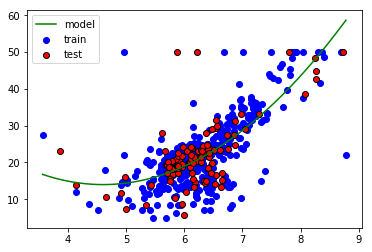

In [19]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1,)

plt.scatter(X_train_f, Y_train, color="blue", label="train")
plt.scatter(X_test_f, Y_test, color="red", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="green", label="model")

plt.legend()
plt.show()

#### 4.5 Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

* Podemos observar que el modelo de **Regresión Polinomial de grado 2** (para la variable RM), se ajusta mejor que el modelo de **Regresión Lineal** calculado anteriormente, por lo tanto podemos decir que es un modelo más performante.
* Los valores bajos de la variable **RM** por ejemplo RM=3 y RM=4 se observan un poco más alejados de la línea que identifica el modelo.
* Con respecto a los valores superiores de la variable **RM**, la rama de la parabola ajusta mejor a los datos, que lo que se conseguía concon el modelo de Regresión Lineal.
* En la zona media de los datos, se observa que ambos modelos ajustan de modo semejante.

## Ejercicio 5: Regresión con más de un Atributo

* En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

#### 5.1 Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.

In [20]:
# Selección de atributos = CRIM, RM y LSTAT
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

#### 5.2 Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

In [21]:
train_errors_multiple = []
test_errors_multiple = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # grados del polinomio

for degree in degrees:
    # Entrenamiento (train):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, Y_train)
    
    #  Predicción (predict):
    Y_train_pred = model.predict(X_train_f)
    Y_test_pred = model.predict(X_test_f)
    
    # Evaluación (evaluate):
    train_error_multiple = mean_squared_error(Y_train, Y_train_pred)
    test_error_multiple = mean_squared_error(Y_test, Y_test_pred)
    train_errors_multiple.append(train_error_multiple)
    test_errors_multiple.append(test_error_multiple)

In [22]:
from sklearn.metrics import mean_squared_error

# Cálculo del error cuadrático medio sobre ambos conjuntos de datos (train y test)
train_error_multiple = mean_squared_error(Y_train, Y_train_pred)
test_error_multiple = mean_squared_error(Y_test, Y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:32.9
Test error:46.0


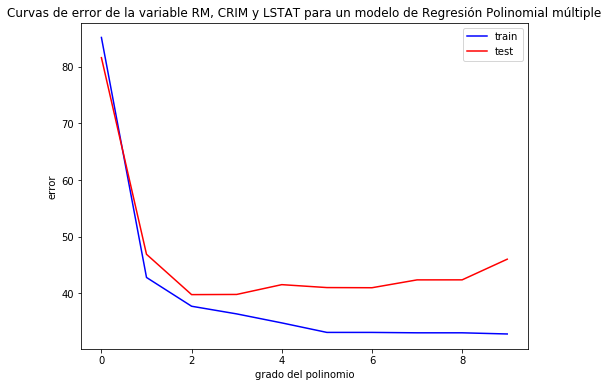

In [23]:
# Gráfico de curvas de error
plt.figure(figsize=(8,6))

plt.plot(degrees, train_errors_multiple, color="blue", label="train")
plt.plot(degrees, test_errors_multiple, color="red", label="test")
plt.legend()
plt.title("Curvas de error de la variable RM, CRIM y LSTAT para un modelo de Regresión Polinomial múltiple")
plt.xlabel("grado del polinomio")
plt.ylabel("error")
plt.show()

#### 5.3 Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

* EL modelo de Regresión Polinomial que mejor ajusta, es el modelo de **grado 2** tanto para el set de datos de test como el de train.
* Podemos observar que el modelo de **grado 2** mejora con respecto al de **grado 1**.
* A partir del polinomio de **grado 3** el error en el grupo de test aumenta notablemnete y comienza a detectarse el fenómeno de **overffiting**. 
* En el ejercicio anterior obtuvimos el mismo grado de error tanto en el grupo de test como en el de train.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [24]:
# Recargamos la base de datos y la separamos en dos sets : train y test.
X, Y = boston['data'], boston['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [25]:
# Seleccionamos todos los atributos de entrada
selector = (boston['feature_names'] == 'CRIM')| (boston['feature_names'] == 'ZN')|(boston['feature_names'] == 'INDUS')| (boston['feature_names'] == 'CHAS')|(boston['feature_names'] == 'NOX')| (boston['feature_names'] == 'RM')|(boston['feature_names'] == 'AGE') |(boston['feature_names'] == 'DIS') |(boston['feature_names'] == 'RAD') |(boston['feature_names'] == 'TAX') |(boston['feature_names'] == 'PTRATIIO') | (boston['feature_names'] == 'B') |(boston['feature_names'] == 'LSTAT')
            
X_train_full = X_train[:, selector]
X_test_full = X_test[:, selector]

train_errors_full = []
test_errors_full = []

#degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # grados del polinomio
degrees = [i for i in range(1, 10)]
for degree in degrees:
    
    # Entrenamiento (train):
    model_full = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_full.fit(X_train_full, Y_train)
    
    #  Predicción (predict):
    Y_train_pred_full = model_full.predict(X_train_full)
    Y_test_pred_full = model_full.predict(X_test_full)
    
    # Evaluación (evaluate):
    train_error_full = mean_squared_error(Y_train, Y_train_pred_full)
    test_error_full = mean_squared_error(Y_test, Y_test_pred_full)
    train_errors_full.append(train_errors_full)
    test_errors_full.append(test_errors_full)
    
    print(f'\n\nGrado {degree}:')
    print(f'Train error para polinomio de Grado {degree}: {train_error_full:0.3f}')
    print(f'Test error para polinomio de Grado {degree}: {test_error_full:0.3f}')




Grado 1:
Train error para polinomio de Grado 1: 22.216
Test error para polinomio de Grado 1: 33.677


Grado 2:
Train error para polinomio de Grado 2: 6.063
Test error para polinomio de Grado 2: 32.186


Grado 3:
Train error para polinomio de Grado 3: 0.039
Test error para polinomio de Grado 3: 32468.867


Grado 4:
Train error para polinomio de Grado 4: 0.000
Test error para polinomio de Grado 4: 922053.862


Grado 5:
Train error para polinomio de Grado 5: 0.000
Test error para polinomio de Grado 5: 77881.628


Grado 6:
Train error para polinomio de Grado 6: 0.000
Test error para polinomio de Grado 6: 695977.814


Grado 7:
Train error para polinomio de Grado 7: 0.000
Test error para polinomio de Grado 7: 323106.085


Grado 8:
Train error para polinomio de Grado 8: 0.000
Test error para polinomio de Grado 8: 345909.008


Grado 9:
Train error para polinomio de Grado 9: 0.000
Test error para polinomio de Grado 9: 305151.475


* Podemos observar que el hecho de incluir todos los atributos no mejora el modelo.
* A medida que aumenta el grado del polinomio, disminuye el error en el grupo de entrenamiento, pero aumenta muchisimo el error en el grupo de test. Esto nos muestra el efecto de overfitting.
* El modelo más óptimo es el de grado 2.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [27]:
# Selección de atributos = CRIM, RM y LSTAT
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train= X_train[:, selector]
X_test= X_test[:, selector]
X_train.shape, X_test.shape

((404, 3), (102, 3))

In [28]:
train_errors= []
test_errors= []

train_errors_Ridge= []
test_errors_Ridge= []

degree = 2
alphas = [0.1,0.2,0.5,1.0,3.0,5.0,10.0]

for alpha in alphas:
    
    # Entrenamiento (train):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
           # Modelo de Regresión Lineal
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
           # Modelo con Regulacion Ridge
    model_Ridge= linear_model.RidgeCV(alphas)
    model_Ridge.fit(X_train, Y_train)
    
    #  Predicción (predict):
        # Modelo de Regresión Lineal
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
        # Modelo con Regulacion Ridge
    Y_train_Ridge_pred = model_Ridge.predict(X_train)
    Y_test_Ridge_pred = model_Ridge.predict(X_test)
    
    # Evaluación (evaluate):
        # Modelo de Regresión Lineal
    train_error = mean_squared_error(Y_train, Y_train_pred)
    test_error = mean_squared_error(Y_test, Y_test_pred)
    train_errors.append(train_errors)
    test_errors.append(test_errors)
        # Modelo con Regulacion Ridge
    train_error_Ridge = mean_squared_error(Y_train, Y_train_Ridge_pred)
    test_error_Ridge = mean_squared_error(Y_test, Y_test_Ridge_pred)
    train_errors_Ridge.append(train_errors_Ridge)
    test_errors_Ridge.append(test_errors_Ridge)
    

In [29]:
train_error = mean_squared_error(Y_train, Y_train_pred)
test_error= mean_squared_error(Y_test, Y_test_pred)
print('Modelo de Regresión Lineal')
print(f'Error de Entrenamiento: {train_error:0.3f}')
print(f'Error de Test: {test_error:0.3f}')

Modelo de Regresión Lineal
Error de Entrenamiento: 27.786
Error de Test: 38.758


In [30]:
train_error_Ridge = mean_squared_error(Y_train, Y_train_Ridge_pred)
test_error_Ridge= mean_squared_error(Y_test, Y_test_Ridge_pred)
print('Modelo con Regulacion Ridge')
print(f'Error de Entrenamiento: {train_error_Ridge:0.3f}')
print(f'Error de Test: {test_error_Ridge:0.3f}')

Modelo con Regulacion Ridge
Error de Entrenamiento: 27.800
Error de Test: 38.664


* No observamos una mejora notoria al aplicar la regularización Ridge.